In [12]:
import numpy as np

### Tokenization
* Tokenization is a process that splits an input sequence in so-called tokens
* Can be a word, sentence, paragraph, etc.

**An example**
* nltk.tokenize.WhitespaceTokenizer
    * `This` `is` `Vishal's` `text,` `isn't` `it?`
    * Problem: "it" and "it?" are different tokens with same meaning
* split by **Punctutation** : nltk.tokenize.WordPunctTokenizer
    * `This` `is` `Vishal` `'` `s` `text` `,` `isn` `'` `t` `it` `?`
    * Problem: "s", "isn", "t" are not very meanngful
* nltk.tokenize.TreebankWordTokenizer
    * `This` `is` `Vishal` `'s` `text` `,` `is` `n't` `it` `?`
    * "'s" and "n't" are more meaningful

In [1]:
import nltk
text = "This is Vishal's text, isn't it?"

In [2]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokenizer.tokenize(text)

['This', 'is', "Vishal's", 'text,', "isn't", 'it?']

In [3]:
tokenizer = nltk.tokenize.WordPunctTokenizer()
tokenizer.tokenize(text)

['This', 'is', 'Vishal', "'", 's', 'text', ',', 'isn', "'", 't', 'it', '?']

In [4]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokenizer.tokenize(text)

['This', 'is', 'Vishal', "'s", 'text', ',', 'is', "n't", 'it', '?']

### Token normalization 
for example:
* wolf, wolves => wolf
* talk, talks => talk

#### Stemming
* Aprocess of removing and replacing suffixes to get to the root of the word, also called **stem**
* Usually refers to heuristic that chop off suffixes

**Porter's stemmer**   (`nltk.stem.PorterStemer`)

`Rule`          
    * SSES => SS        
    * IES => I
    * SS => SS
    * S => 

    `examples`
    * caresses => caress
    * ponies => poni
    * caress => caress
    * cats => cat

    Problem: fails on irregular forms, poduces non-words

#### Lemmatization
* Usually refers to doing things properly with the use of a vocabulary and morphological analysis
* Returns the base or dictionary form of a word, aka **lemma**

**WordNet lemmatizer**  (`nltk.stem.WordNetLemmatizer`)
    * uses the `WordNet Databases` to lookup kemmas
    * e.g.
        * feet => foot
        * cats => cat
        * wolves => wolf
        * talked => talked
    * Problems: not all forms are reduced
    
**Takeaway:** We need to try stemming or lemmatization and choose best for our task

In [5]:
text = "feets cats wolves talked"
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

In [6]:
stemmer = nltk.stem.PorterStemmer()
" ".join(stemmer.stem(token) for token in tokens)

'feet cat wolv talk'

In [7]:
# download wordnet before executing next cell by running following code
# nltk.download('wordnet')

In [8]:
stemmer = nltk.stem.WordNetLemmatizer()
" ".join(stemmer.lemmatize(token) for token in tokens)

'feets cat wolf talked'

#### Further normalization
**Normalizing capital letters**

* Us, us => us  (if both are pronoun)
* us, US(could be pronoun or country)
* We can use heuristic:
    * lowering the begining of the sentences
    * lowering words in title
    * leave mid-sentence wordsa as they are
* Or use ML -> HARD!

**Acronyms**
* eta, e.t.a., E.T.A. => E.T.A.
* Or write a bunch of regular expression-> HARD!

### Feature extraction from Text (or Transform tokens into features)

#### BOW (bag of words)
* count occurences of a partcular token in our text
* for each token we'll have a feature column, this is called `text vectorization`

Problems:
* we loose word order, hence the name "bag words"
* counters are not normalized
    
**Let's preserve some ordering**
* aka **`n-grams`**
    * 1-grams for tokens
    * 2-grams for token pairs
    * ...
    
Problems: too many features

**Remove some n-grams**
Let's remove some n-grams from features based on their occurence frequency in documents of our corpus
* **High frequency n-grams:**
    * Articles, prepositions, etc. (examples: and, a, the)
    * They are called **stop-words**, the won't help us to discriminate texts -> `REMOVE THEM`
* **Low frequency n-grams:**
    * Typos, rare n-grams
    * We `don't need` them ether, otherwse we'll likely overfit
* **Medium frequency n-grams:**
    * Those are good n-grams
    
**There're lot of medium frequency n-grams**
* It is useful to look at n-grams frequency in our corpus for filtering out bad n-grams
* What if we use it for ranking of medium frequency n-grams?
* **Idea:** the n-gram with smaller frequency can be more discriminating bcz it can capture a specific issue in the review

### TF-IDF 

#### Term Frequency (TF)
* `tf(t,d)` -> frequency for term (or n-gram) `t` in `document d`
* Variants:

| Weighting scheme | TF weight |
| --- | --- |
| binary | 0,1 |
| raw count | $f_{t,d}$ |
| term frequency | $f_{t,d}$/$\sum_{t' \in d}f_{t,d}$ |
| log normalization | 1 + log($f_{t,d}$) |

####  Inverse documentary frequency (IDF)
* `N = |D|` -> total number of documents in `corpus D`(set of all our documents)
* `|{d in D: t in d}|` -> number of documents where the term t appears
* `idf(t, D)` = log( N / |{d in D: t in d}|

#### TF- IDF
* `tfidf(t, d, D)` = tf(t, d) . idf(t, D)
* A high weight in TF-IDF is reached by a high term frequency of the term in the whole collection of documents

### Better BOW
* Replace counters with TF-IDF
* Normalize the results row-wise (dvide by L2-norm)

The above work will help us to get about some critical reviews (i.e. not often appearing words)

refer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
texts = [
    "good movie", "not a good movie", "did not like",
    "i like it", "good one"
]
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
features = tfidf.fit_transform(texts)
pd.DataFrame(features.todense(),  # Return a dense matrix representation of this matrix.
             columns=tfidf.get_feature_names()   # it returns a list of feature names
            )

,good movie,like,movie,not
0,0.707107,0.000000,0.707107,0.000000
1,0.577350,0.000000,0.577350,0.577350
2,0.000000,0.707107,0.000000,0.707107
3,0.000000,1.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000


### Linear model for sentment analysis
#### First text classification model
**IMDB movie reviews dataset**
* http://ai.stanford.edu/~amaas/data/sentiment/
* Contains 25000 +ve and 25000 -ve reviews
* Contains at most 30 revews per movie
* 50/50 train-test split
* Evaluation: accuracy

* `question`
    * Let's consider a bag-of-words representation for text. Which models are better suited for such sparse features?

    * Gradient Boosted Trees
    * Decision Tree
    * Naive Bayes
        * Correct 
        * This is fine and fast and works for millions of features.
    * Linear model
        * Correct 
        * This is fine and fast and works for millions of features.
        
**Model: Logistic regression**
* p(y=1|x) = $\sigma(w^T.x)$
* `Linear` classifcaton model
* can handle `sparse data`
* `Fast` to train
* Weghts can be `interpreted`

Below code is taken from 
* https://itnext.io/machine-learning-sentiment-analysis-of-movie-reviews-using-logisticregression-62e9622b4532

**Load data into program**

In [13]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb_v1.tar/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target

print(' no. of documents in train data: {}'.format(len(text_train)))
print('samples per class (train): {}'.format(np.bincount(y_train)))

reviews_test = load_files("aclImdb_v1.tar/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target

print('no. of documents in test data: {}'.format(len(text_test)))
print('samples per class (test): {}'.format(np.bincount(y_test)))

 no. of documents in train data: 25000
samples per class (train): [12500 12500]
no. of documents in test data: 25000
samples per class (test): [12500 12500]


In [20]:
text_train[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [21]:
y_train[0]

1

**Representing text data as Bag of Words**

In order to represent the input dataset as Bag of words, we will use `CountVectorizer` and call it’s `transform` method. `CountVectorizer` is a transformer that converts the input documents into `sparse matrix` of features.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=5, ngram_range=(2,2))
X_train = vect.fit(text_train).transform(text_train)
X_test = vect.transform(text_test)

print("vocabulary size: {}".format(len(vect.vocabulary_)))
print("X_train:\n{}".format(repr(X_train)))
print("X_test: \n{}".format(repr(X_test)))

feature_names = vect.get_feature_names()
print("no. of features: {}".format(len(feature_names)))

vocabulary size: 129549
X_train:
<25000x129549 sparse matrix of type '<class 'numpy.int64'>'
	with 3607330 stored elements in Compressed Sparse Row format>
X_test: 
<25000x129549 sparse matrix of type '<class 'numpy.int64'>'
	with 3392376 stored elements in Compressed Sparse Row format>
no. of features: 129549


In [28]:
feature_names[:10]

['00 and',
 '00 in',
 '000 00',
 '000 000',
 '000 and',
 '000 budget',
 '000 feet',
 '000 for',
 '000 in',
 '000 people']

* `vect.fit()`  ==>> Learn a vocabulary dictionary of all tokens in the raw documents.
* `vect.transform()`  ==>>  Transform documents to document-term matrix.

**Model Development**

We will use `LogisticRegression` for model development as for high dimensional sparse data like ours, LogisticRegression often works best.

While developing model, we need to do two other things —
* `Grid Search`: for paramater tuning of LogisticRegression. We want to determine what value of coefficeint ‘C’ provides better accuracy.
* `Cross validation`: in order to avoid overfitting of data.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr_grid = {'C': [0.001, 0.01, 1, 10]}
gs_model = GridSearchCV(estimator= LogisticRegression(),
                        param_grid= lr_grid,
                       cv=5)

gs_model.fit(X_train, y_train)

print("best cross-validation score: {:.2f}".format(gs_model.best_score_))
print("best parameters: ",gs_model.best_params_)
print("best estimator: ",gs_model.best_estimator_)

C:\Users\Vishal Rao\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Vishal Rao\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

best cross-validation score: 0.88
best parameters:  {'C': 1}
best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\Vishal Rao\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
print("best cross-validation score: {:.2f}".format(gs_model.best_score_))
print("best parameters: ",gs_model.best_params_)
print("best estimator: ",gs_model.best_estimator_)

best cross-validation score: 0.88
best parameters:  {'C': 1}
best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


We want to plot the best and worst top 25 features.

**||||||||||||||||||||||||||||||||||||||||**

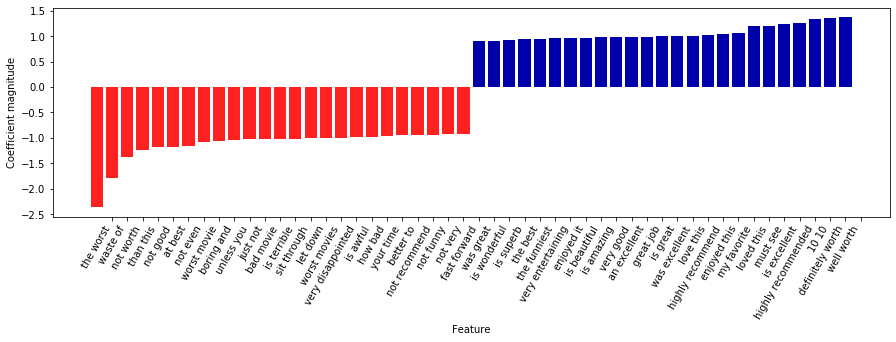

In [38]:
import matplotlib.pyplot as plt
import mglearn

mglearn.tools.visualize_coefficients(gs_model.best_estimator_.coef_,
                                    feature_names,
                                    n_top_features=25)  # it will take largest 25 (top +ve) and smallest 25 (top -ve)      
plt.show()

**Making prediction**

In [35]:
lr = gs_model.best_estimator_
lr.fit(X_train, y_train)
lr.predict(X_test)
print('score: {:.2f}'.format(lr.score(X_test, y_test)))

score: 0.88


C:\Users\Vishal Rao\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


THANK YOU!!!